In [ ]:
#Classifyiing mnist dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.7898 - loss: 0.6681 - val_accuracy: 0.9800 - val_loss: 0.0671
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.9663 - loss: 0.1116 - val_accuracy: 0.9863 - val_loss: 0.0497
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9765 - loss: 0.0782 - val_accuracy: 0.9892 - val_loss: 0.0407
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - accuracy: 0.9807 - loss: 0.0656 - val_accuracy: 0.9883 - val_loss: 0.0381
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9830 - loss: 0.0571 - val_accuracy: 0.9905 - val_loss: 0.0346
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9863 - loss: 0.0364
Test Accuracy: 0.9894000291824341


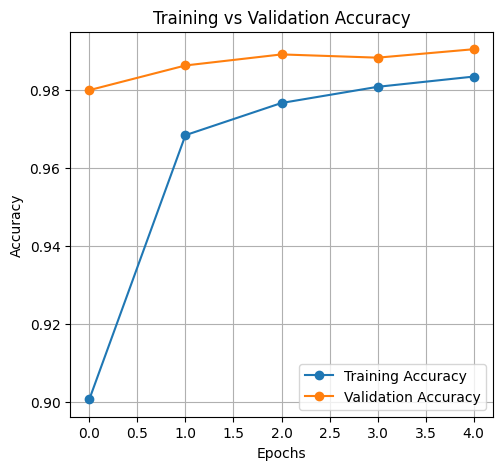

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model and store history
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot Training vs Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

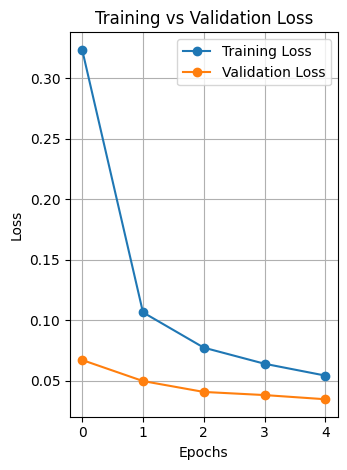

In [33]:
# Plot Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()